# Step 1

Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.



In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create a path
path = r'C:\Users\Maya\OneDrive\Documents\CareerFoundry\Achievement 4 - Python Fundamentals for Data Analysts\Jupyter Instacart Basket Analysis'
#import orders_products_all.pkl
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_all.pkl'))

In [ ]:
#check head
df.head()

In [3]:
#check columns
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_of_dependents',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices_by_user', 'type_of_spender', 'dsp_order_median',
       'order_frequency_flag', 'region', 'age_flag', 'income_flag',
       'alcohol_flag', 'family_flag'],
      dtype='object')

# Step 2

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [ ]:
#drop first name and last name columns because they are potential privacy issues
df = df.drop(columns = ['first_name', 'last_name'])

In [ ]:
#check that columns were dropped
df.columns

# Step 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
    Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
    Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [ ]:
#create a data dictionary of regions
region_dict = {
    'Maine' : 'Northeast'
    'New Hampshire' : 'Northeast'
    'Vermont' : 'Northeast'
    'Massachusetts' : 'Northeast'
    'Rhode Island' : 'Northeast'
    'Connecticut' : 'Northeast'
    'New York' : 'Northeast'
    'Pennsylvania' : 'Northeast'
    'New Jersey' : 'Northeast'
    'Wisconsin' : 'Midwest'
    'Michigan' : 'Midwest'
    'Illinois' : 'Midwest'
    'Indiana' : 'Midwest'
    'Ohio' : 'Midwest'
    'North Dakota' : 'Midwest'
    'South Dakota' : 'Midwest'
    'Nebraska' : 'Midwest'
    'Kansas' : 'Midwest'
    'Minnesota' : 'Midwest'
    'Iowa' : 'Midwest'
    'Missouri' : 'Midwest'
    'Delaware' : 'South'
    'Maryland' : 'South'
    'District of Columbia' : 'South'
    'Virginia' : 'South'
    'West Virginia' : 'South'
    'North Carolina' : 'South'
    'South Carolina' : 'South'
    'Georgia' : 'South'
    'Florida' : 'South'
    'Kentucky' : 'South'
    'Tennessee' : 'South'
    'Mississippi' : 'South'
    'Alabama' : 'South'
    'Oklahoma' : 'South'
    'Texas' : 'South'
    'Arkansas' : 'South'
    'Louisiana' : 'South'
    'Arizona' : 'West'
    'Colorado' : 'West'
    'Idaho' : 'West'
    'Montana' : 'West'
    'Nevada' : 'West'
    'New Mexico' : 'West'
    'Utah' : 'West'
    'Wyoming' : 'West'
    'Alaska' : 'West'
    'California' : 'West'
    'Hawaii' : 'West'
    'Oregon' : 'West'
    'Washington' : 'West'
}

def get_region(area):
    return region_dict[area]

df['region'] = df['state'].apply(get_region)

In [ ]:
#check value counts
df['region'].value_counts(dropna = False)

In [ ]:
#create crosstab to compare data
crosstab = pd.crosstab(df['region'], df['type_of_spender'], dropna = False)

In [ ]:
crosstab

# Step 4

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [ ]:
#create flags for activity
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'High activity'
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [ ]:
#check value counts
df['activity_flag'].value_counts(dropna = False)

In [ ]:
#check new column
df.head()

In [ ]:
#create a subset of high activity customers
df_high_activity = df.loc[df['activity_flag'] == 'High Activity']

In [ ]:
#export high activity subset
df_high_activity.to_pickle(os.path.join(path,'Data','Prepared Data','high_activity_subset.pkl'))

# Step 5

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


Profiles:

age_flag (Young adult: age <= 30, Adult: age 31-64, Senior: age >= 65)

income_flag (Low income: income < 40k, Mid income: income 40k-100k, High income: income>100k)

alcohol_flag (Alcohol buyer: department_id == 5, Non-alcohol buyer: department_id != 5)

family_flag (Has kids: no_of_dependents >= 1 , No kids: no_of_dependents == 0)

In [ ]:
# create flags for age
df.loc[df['age'] <= 30, 'age_flag'] = 'Young Adult'
df.loc[(df['age'] > 30) & (df['age'] < 65), 'age_flag'] = 'Adult'
df.loc[df['age'] >= 65, 'age_flag'] = 'Senior'

In [ ]:
#check value counts
df['age_flag'].value_counts()

In [ ]:
# create flags for income
df.loc[df['income'] < 40000, 'income_flag'] = 'Low Income'
df.loc[(df['income'] >= 40000) & (df['income'] <= 100000), 'income_flag'] = 'Mid Income'
df.loc[df['income'] > 100000, 'income_flag'] = 'High income'

In [ ]:
#check value counts
df['income_flag'].value_counts()

In [ ]:
result1 = []

for value in df["department_id"]:
  if value == 5:
    result1.append("Alcohol buyer")
  else:
    result1.append("Non-alcohol buyer")

In [ ]:
#create new column
df['alcohol_flag'] = result1

In [ ]:
#check value counts
df['alcohol_flag'].value_counts()

In [ ]:
# create flags for family
df.loc[df['no_of_dependents'] > 0, 'family_flag'] = 'Has kids'
df.loc[df['no_of_dependents'] == 0, 'family_flag'] = 'No kids'

In [ ]:
#check value counts
df['family_flag'].value_counts()

# Step 6

Create an appropriate visualization to show the distribution of profiles.

In [ ]:
age_bar = df['age_flag'].value_counts().plot.bar(color = ['maroon', 'salmon', 'pink'])

In [ ]:
income_bar = df['income_flag'].value_counts().plot.bar(color = ['indigo', 'purple', 'blue'])

In [ ]:
alcohol_pie = df['alcohol_flag'].value_counts().plot.pie(label='', labels=['non-alcohol buyer', 'alcohol buyer'])

In [ ]:
family_pie = df['family_flag'].value_counts().plot.pie(label='', labels=['has kids', 'no kids'])

In [ ]:
#export age bar
age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_bar.png'))

In [ ]:
#export income bar
income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_bar.png'))

In [ ]:
#export alcohol pie
alcohol_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'alcohol_pie.png'))

In [ ]:
#export family pie
family_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'family_pie.png'))

# Step 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
#age flag and usage frequency 

df.groupby('age_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
#age flag and expenditure

df.groupby('age_flag').agg({'prices': ['mean', 'min', 'max']})

In [ ]:
#income flag and usage frequency 

df.groupby('income_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
#income flag and expenditure

df.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

In [ ]:
#alcohol flag and usage frequency 

df.groupby('alcohol_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
#alcohol flag and expenditure

df.groupby('alcohol_flag').agg({'prices': ['mean', 'min', 'max']})

In [ ]:
#family flag and usage frequency 

df.groupby('family_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
#family flag and expenditure

df.groupby('family_flag').agg({'prices': ['mean', 'min', 'max']})

# Step 8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [ ]:
#create crosstab for age flag and region

age_flag_crosstab = pd.crosstab(df['age_flag'], df['region'], dropna = False)

In [ ]:
age_flag_crosstab

In [ ]:
#create crosstab for income flag and region

income_flag_crosstab = pd.crosstab(df['income_flag'], df['region'], dropna = False)

In [ ]:
income_flag_crosstab

In [ ]:
#create crosstab for alcohol flag and region

alcohol_flag_crosstab = pd.crosstab(df['alcohol_flag'], df['region'], dropna = False)

In [ ]:
alcohol_flag_crosstab

In [ ]:
#create crosstab for family flag and region

family_flag_crosstab = pd.crosstab(df['family_flag'], df['region'], dropna = False)

In [ ]:
family_flag_crosstab

# Step 9

Produce suitable charts to illustrate your results and export them in your project folder.

In [ ]:
#create crosstab for age flag by region
age_region_bar = pd.crosstab(df['region'], columns = df['age_flag'])

#create cross tab to display labels
age_region_bar_labels = pd.crosstab(df['region'], columns = df['age_flag'])

In [ ]:
#create bar chart for age flag by region

age_region_bar = age_region_bar.plot(kind ='bar', stacked = False, color = ['maroon', 'salmon', 'pink'], figsize = (12,10))
plt.title('Age by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [4]:
#create crosstab for income flag by region
income_region_bar = pd.crosstab(df['region'], columns = df['income_flag'])

#create cross tab to display labels
income_region_bar_labels = pd.crosstab(df['region'], columns = df['income_flag'])

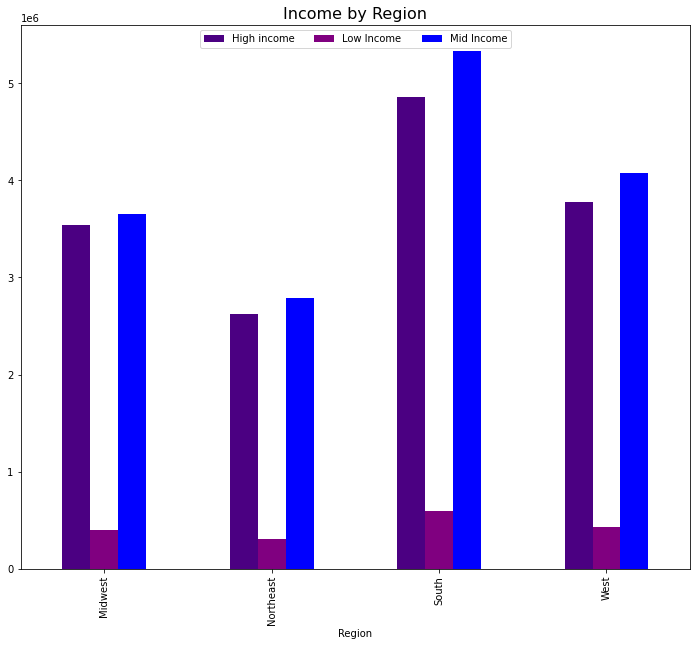

In [5]:
#create bar chart for income flag by region
income_region_bar = income_region_bar.plot(kind ='bar', stacked = False, color = ['indigo', 'purple', 'blue'], figsize = (12,10))
plt.title('Income by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [ ]:
#create crosstab for alcohol flag by region
alcohol_region_bar = pd.crosstab(df['region'], columns = df['alcohol_flag'])

#create cross tab to display labels
alcohol_region_bar_labels = pd.crosstab(df['region'], columns = df['alcohol_flag'])

In [ ]:
#create bar chart for alcohol flag by region

alcohol_region_bar = alcohol_region_bar.plot(kind ='bar', stacked = False, color = ['green','lightgreen'], figsize = (12,10))
plt.title('Alcohol Buyers by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [ ]:
#create crosstab for family flag by region
family_region_bar = pd.crosstab(df['region'], columns = df['family_flag'])

#create cross tab to display labels
family_region_bar_labels = pd.crosstab(df['region'], columns = df['family_flag'])

In [ ]:
#create bar chart for family flag by region

family_region_bar = family_region_bar.plot(kind ='bar', stacked = False, color = ['turquoise','blue'], figsize = (12,10))
plt.title('Families vs Nonfamilies by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [ ]:
#export age by region bar chart

age_region_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_region_bar.png'))

In [6]:
#export income by region bar chart
income_region_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_region_bar.png'))

In [ ]:
#export alcohol by region bar chart

alcohol_region_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'alcohol_region_bar.png'))

In [ ]:
#export family by region bar chart

family_region_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'family_region_bar.png'))

# Step 10

Tidy up your script, export your final data set, and save your notebook.

In [ ]:
df.columns

In [ ]:
df.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final_dataset.pkl'))